# [과제] latent factor model practice <br>
강의슬라이드 L08.1 latent factor model practice 를 참고하여 모든 실습을 수행한 결과를 제출하세요.

제출 파일 형식은 ipynb입니다.

제출 파일은 코드와 실행 결과를 모두 포함하여야 합니다.

colab에서 실습을 수행한 경우 "파일 > .ipynb 다운로드" 를 클릭하여 다운로드하고, 파일 이름은 "학번_이름.ipynb" 로 하여 제출하세요.



In [2]:
# MovieLens 데이터 준비

!wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip

--2023-11-09 01:31:14--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  8.87MB/s    in 0.5s    

2023-11-09 01:31:15 (8.87 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.ba

In [17]:
# 구글드라이브 연결하기 -> colab에서 직접 다운로드
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
# 파일 불러오기
train = pd.read_csv("ml-100k/ua.base",
                    sep="\t", names=['user','movie', 'rating', 'timestamp'])
test = pd.read_csv("ml-100k/ua.test",
                   sep="\t", names=['user','movie', 'rating', 'timestamp'])

In [4]:
# pytorch tensor 데이터로 변환
items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

Latent Factor Model

- rank→사용자vector,아이템vector의차원<br>
- numUsers→사용자수<br>
- numItems→아이템수<br>
- P→아이템매트릭스<br>
- Q→사용자매트릭스

epoch: 0, cost: 23.934498
epoch: 100, cost: 0.567104
epoch: 200, cost: 0.494785
epoch: 300, cost: 0.471314
epoch: 400, cost: 0.461034
epoch: 500, cost: 0.455256
epoch: 600, cost: 0.451653
epoch: 700, cost: 0.449268
epoch: 800, cost: 0.447549
epoch: 900, cost: 0.446158
epoch: 1000, cost: 0.445005


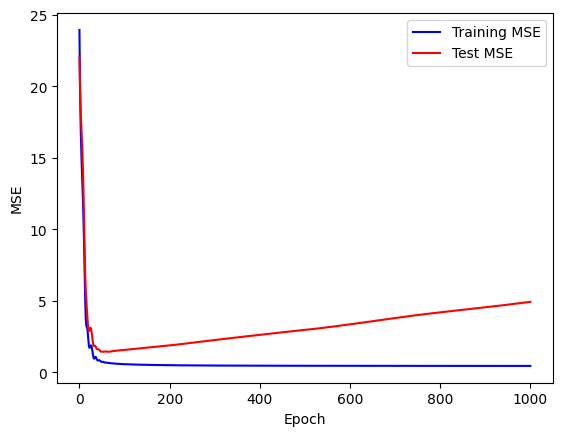

In [32]:
# Latent Factor Model

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)


x = []
y = []
y_test = []

# 기본 Matrix Factoriztion 구현
optimizer = torch.optim.Adam([P, Q], lr= 0.1)
for epoch in range(1001):
  hypothesis = torch. sum(P[items] * Q[users], dim= 1)
  cost = F.mse_loss(hypothesis ,ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x.append(epoch)
  y.append(cost.item())

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

# Matplolib으로 epoch마다 Training MSE & Test MSE 그려보기
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x, y, c="blue", label="Training MSE")
plt.plot(x,y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

Regularization

epoch: 0, cost: 24.292950
epoch: 100, cost: 0.693167
epoch: 200, cost: 0.640373
epoch: 300, cost: 0.630512
epoch: 400, cost: 0.627582
epoch: 500, cost: 0.626489
epoch: 600, cost: 0.626099
epoch: 700, cost: 0.625950
epoch: 800, cost: 0.625891
epoch: 900, cost: 0.625867
epoch: 1000, cost: 0.625857


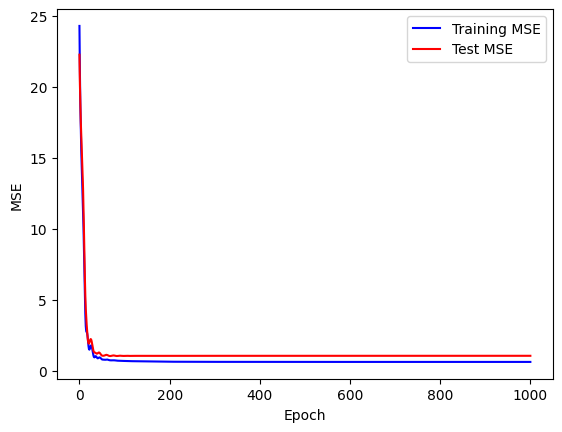

In [34]:
# Latent Factor Model
# Regularization

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)


x = []
y = []
y_test = []

lambda1 = 0.0001
lambda2 = 0.0001

# 기본 Matrix Factoriztion 구현
optimizer = torch.optim.Adam([P, Q], lr= 0.1)
for epoch in range(1001):
  hypothesis = torch. sum(P[items] * Q[users], dim= 1)
  cost = F.mse_loss(hypothesis ,ratings)

  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  x.append(epoch)
  y.append(cost.item())

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

# Matplolib으로 epoch마다 Training MSE & Test MSE 그려보기
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x, y, c="blue", label="Training MSE")
plt.plot(x,y_test, c="red", label="Test MSE")
plt.legend()
plt.show()

epoch: 0, cost: 12.920452
epoch: 100, cost: 0.635487
epoch: 200, cost: 0.606807
epoch: 300, cost: 0.603834
epoch: 400, cost: 0.603235
epoch: 500, cost: 0.603028
epoch: 600, cost: 0.602910
epoch: 700, cost: 0.602803
epoch: 800, cost: 0.602683
epoch: 900, cost: 0.602495
epoch: 1000, cost: 0.602305


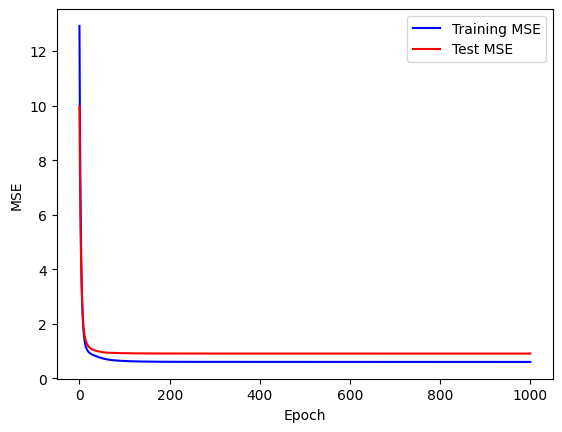

In [35]:
# Latent Factor Model
# Regularization
# Add Bias

rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)


x = []
y = []
y_test = []

lambda1 = 0.0001
lambda2 = 0.0001

lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()


# 기본 Matrix Factoriztion 구현
optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)
for epoch in range(1001):
  hypothesis = torch. sum(P[items] * Q[users], dim= 1) + mean + bias_item[items] + bias_user[users]
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  x.append(epoch)
  y.append(cost.item())

  with torch.no_grad():
    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1) + mean + bias_item[items_test] + bias_user[users_test]
    cost_test = F.mse_loss(hypo_test, ratings_test)
    y_test.append(cost_test)

  if epoch % 100 == 0:
    print("epoch: {}, cost: {:.6f}" .format(epoch, cost.item()))

# Matplolib으로 epoch마다 Training MSE & Test MSE 그려보기
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(x, y, c="blue", label="Training MSE")
plt.plot(x,y_test, c="red", label="Test MSE")
plt.legend()
plt.show()